In [113]:
import numpy as np
import random
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [97]:
max_vertex_count, max_edge_count = 5,5
max_flow_value = 10

In [98]:
def generate_source_sink_network_graph(vertex_count, edge_count):
    if edge_count > (vertex_count - 2) * (vertex_count - 1):  # maximum edges for a directed graph with a single source and sink node
        raise ValueError("Edge count cannot be greater than the maximum possible edges for the given vertex count")

    matrix = np.zeros((vertex_count, vertex_count))

    # Mark the source and sink indices
    source = 0
    sink = vertex_count - 1
    
    edges_added = 0
    while edges_added < edge_count:
        i = random.randint(0, vertex_count - 1)
        j = random.randint(0, vertex_count - 1)

        # Ensure there's no self-loop, reverse edge, and edge already exists
        # Also ensure the source is not the destination and sink is not the origin
        if i != j and matrix[i][j] == 0 and matrix[j][i] == 0 and not (i == sink or j == source):
            matrix[i][j] = random.randint(1, max_flow_value)  # Assign random weight to the edge
            edges_added += 1

    return matrix, source, sink

In [99]:
def ford_fulkerson_optimized_graph(graph, source, sink):
    residual_graph = graph.copy().tolist()
    parent = [-1] * len(graph)
    
    # Store the maximum flow
    max_flow = 0

    while bfs(residual_graph, source, sink, parent):
        path_flow = float("Inf")
        s = sink
        while s != source:
            path_flow = min(path_flow, residual_graph[parent[s]][s])
            s = parent[s]

        max_flow += path_flow

        v = sink
        while v != source:
            u = parent[v]
            residual_graph[u][v] -= path_flow
            residual_graph[v][u] += path_flow
            v = parent[v]

    # Create the optimized graph without reverse edges
    optimized_graph = np.zeros_like(graph)
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            if graph[i][j] > 0:  # If edge exists in the original graph
                flow = graph[i][j] - residual_graph[i][j]
                if flow > 0:  # If positive flow, add to optimized_graph
                    optimized_graph[i][j] = flow

    return max_flow, optimized_graph

In [100]:
def draw_graph_from_adj_matrix(adj_matrix):
    G = nx.DiGraph()

    for i, row in enumerate(adj_matrix):
        for j, weight in enumerate(row):
            if weight != 0:  # If there's an edge between vertices i and j
                G.add_edge(i, j, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = {(i, j): w["weight"] for i, j, w in G.edges(data=True)}

    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

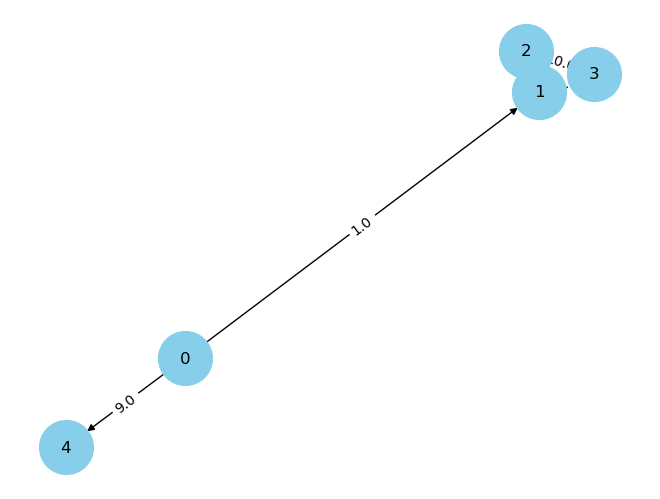

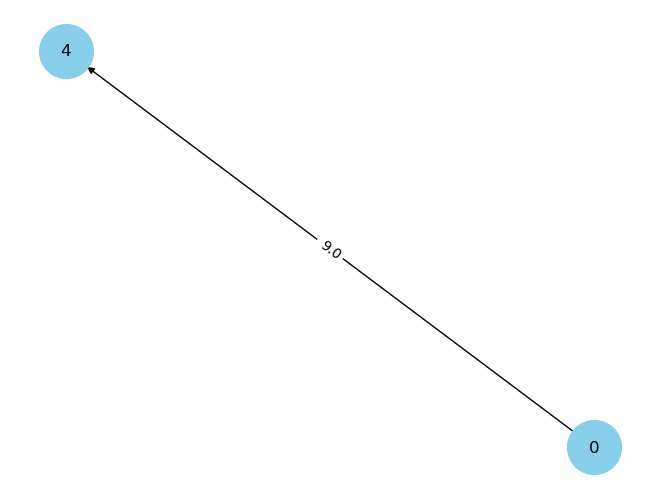

[[ 0.  1.  0.  0.  9.]
 [ 0.  0.  7.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.]
 [ 0.  0.  0.  0.  0.]] 

 [[0. 0. 0. 0. 9.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

 9.0


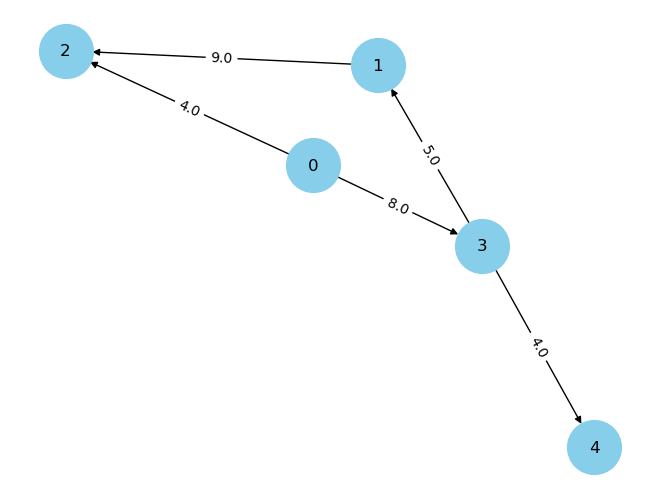

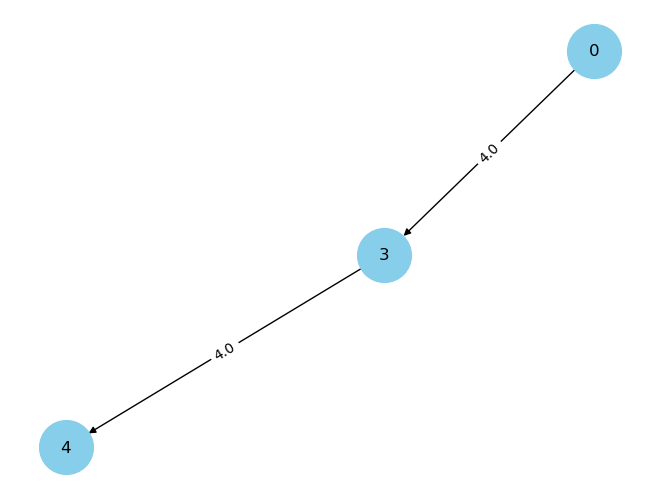

[[0. 0. 4. 8. 0.]
 [0. 0. 9. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 4.]
 [0. 0. 0. 0. 0.]] 

 [[0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0.]] 

 4.0


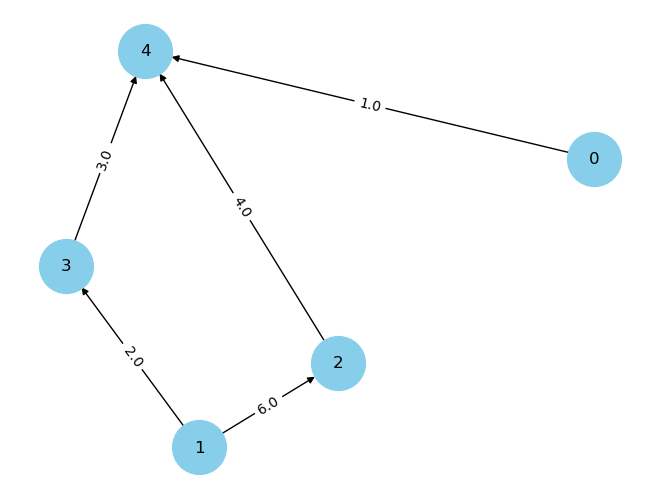

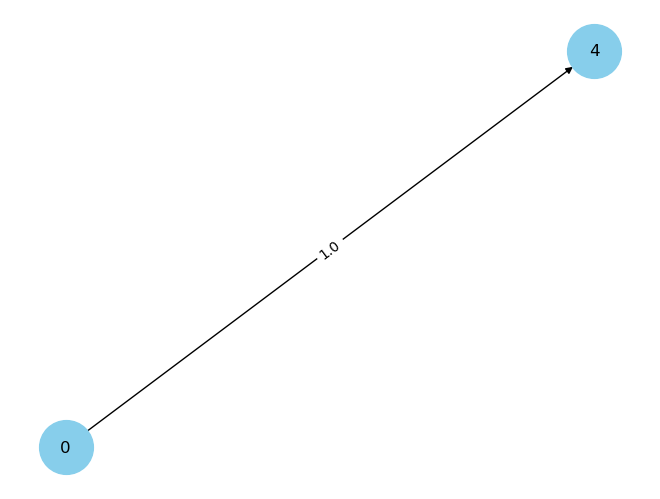

[[0. 0. 0. 0. 1.]
 [0. 0. 6. 2. 0.]
 [0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0.]] 

 [[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

 1.0


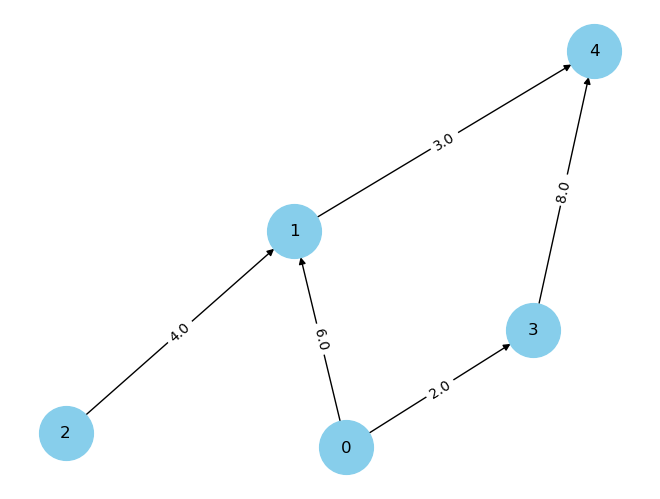

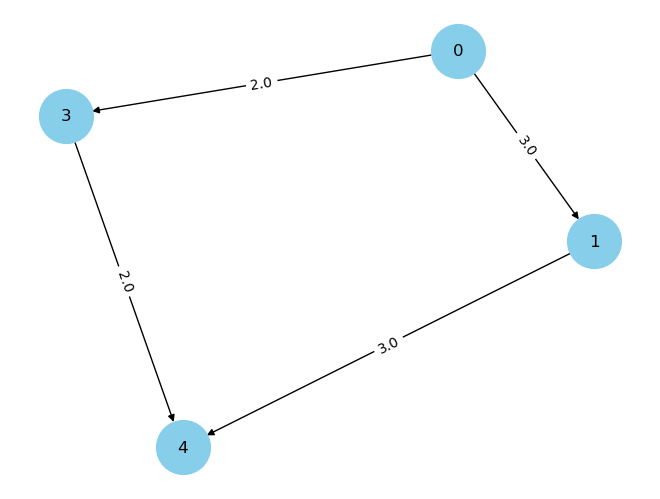

[[0. 6. 0. 2. 0.]
 [0. 0. 0. 0. 3.]
 [0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 8.]
 [0. 0. 0. 0. 0.]] 

 [[0. 3. 0. 2. 0.]
 [0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0.]] 

 5.0


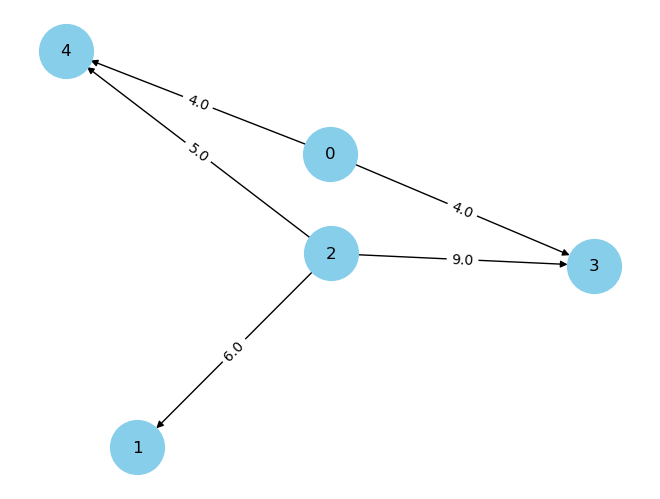

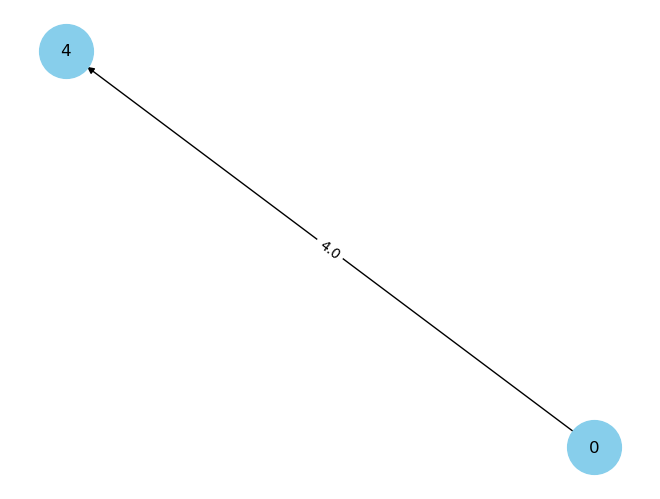

[[0. 0. 0. 4. 4.]
 [0. 0. 0. 0. 0.]
 [0. 6. 0. 9. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

 [[0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

 4.0


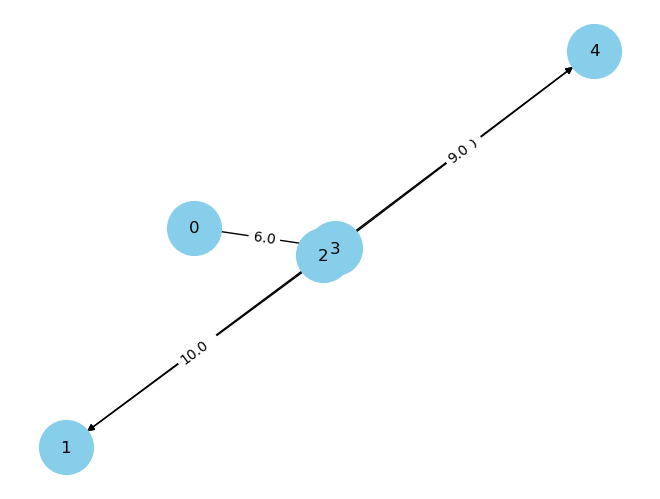

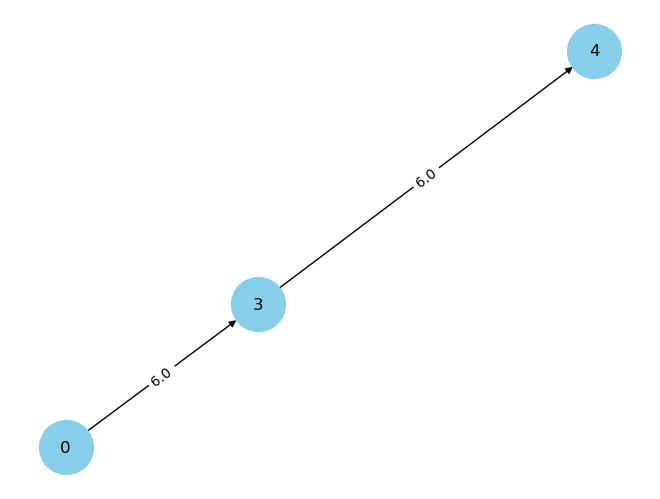

[[ 0.  0.  0.  6.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  9.]
 [ 0. 10.  0.  0. 10.]
 [ 0.  0.  0.  0.  0.]] 

 [[0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0.]] 

 6.0
[[0. 0. 0. 0. 0.]
 [0. 0. 9. 0. 6.]
 [0. 0. 0. 0. 0.]
 [0. 4. 3. 0. 1.]
 [0. 0. 0. 0. 0.]] 

 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

 0


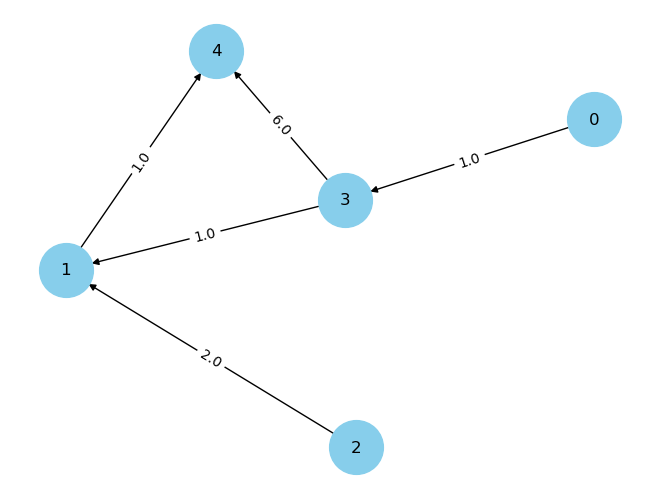

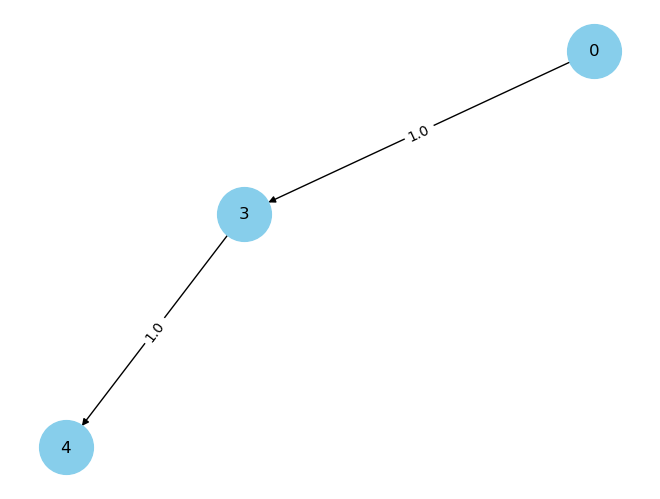

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 2. 0. 0. 0.]
 [0. 1. 0. 0. 6.]
 [0. 0. 0. 0. 0.]] 

 [[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]] 

 1.0


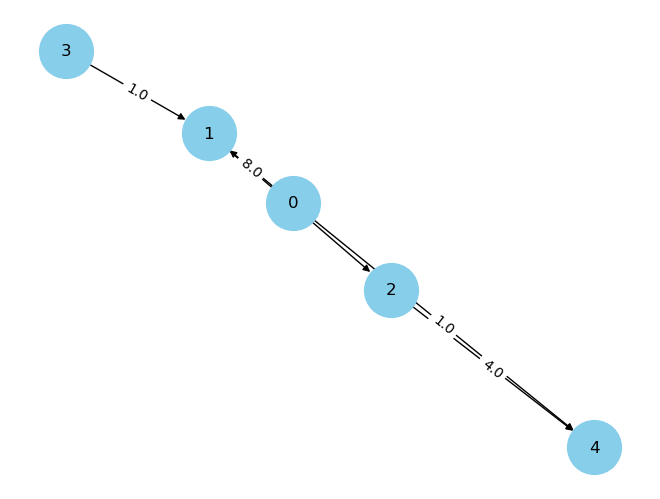

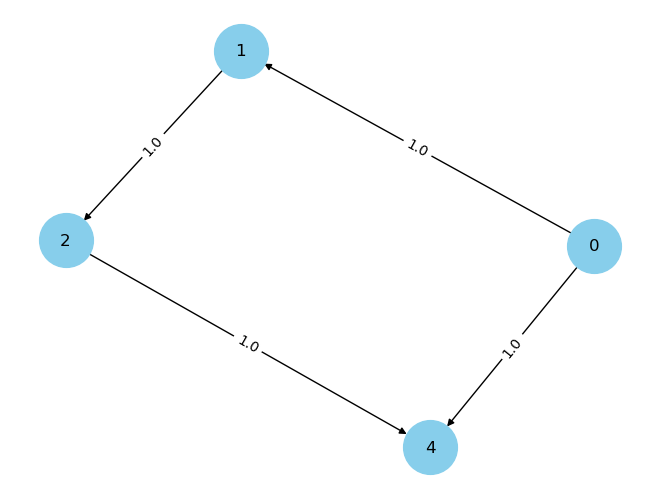

[[0. 8. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 4.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

 [[0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

 2.0


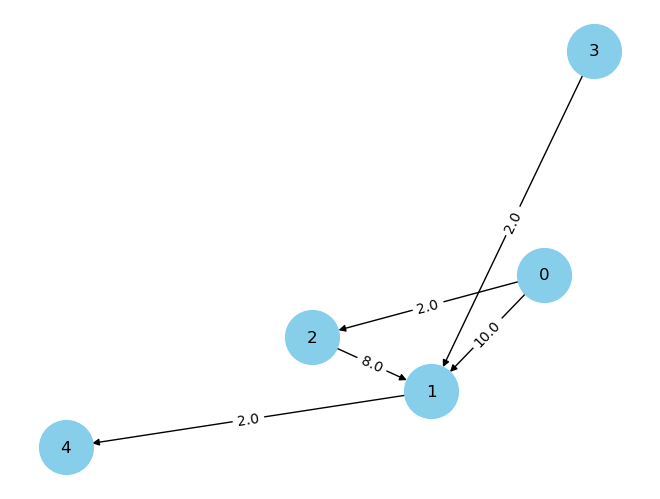

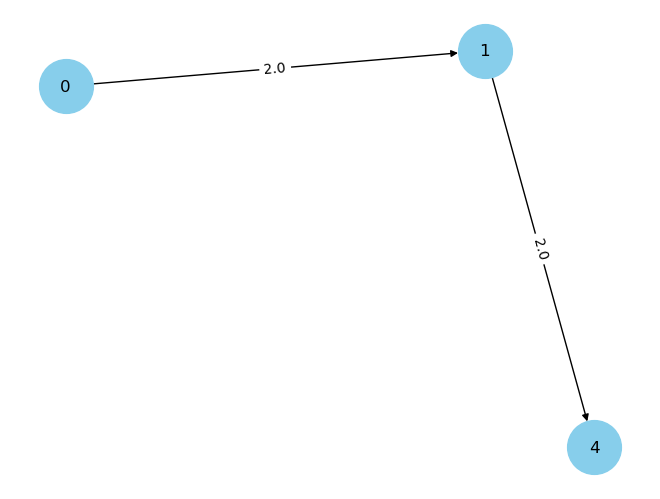

[[ 0. 10.  2.  0.  0.]
 [ 0.  0.  0.  0.  2.]
 [ 0.  8.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]] 

 [[0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

 2.0


In [101]:
for i in range(10):
    adj_matrix, source, sink = generate_source_sink_network_graph(max_vertex_count, max_edge_count)
    max_flow, optimized_graph = ford_fulkerson_optimized_graph(adj_matrix, source, sink)
    if(max_flow): 
        draw_graph_from_adj_matrix(adj_matrix)
        draw_graph_from_adj_matrix(optimized_graph)
    print(adj_matrix, '\n\n', optimized_graph, '\n\n', max_flow)

In [111]:
def save_matrix_to_file(matrix, file_name):
    np.savetxt(file_name, matrix, delimiter=',', fmt='%d')

def generate_and_save_matrices(n):
    for i in range(n):
        graph, source, sink = generate_source_sink_network_graph(max_vertex_count, max_edge_count)
        flow, optimized_graph = ford_fulkerson_optimized_graph(graph, source, sink)
        
        if(flow):
            print(flow, optimized_graph)
            save_matrix_to_file(graph, f'adjacency_matrix_{i+1}.csv')
            save_matrix_to_file(optimized_graph, f'optimized_matrix_{i+1}.csv')
        

In [112]:
generate_and_save_matrices(1)

7.0 [[0. 0. 0. 7. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 7.]
 [0. 0. 0. 0. 0.]]


In [146]:
def save_data_to_pickle(data, file_name):
    with open(file_name, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def generate_and_save_matrices_in_pickle(n):
    adjacency_matrices = []
    optimized_matrices = []
    flows = []
    
    for i in range(n):
        graph, source, sink = generate_source_sink_network_graph(max_vertex_count, max_edge_count)
        flow, optimized_graph = ford_fulkerson_optimized_graph(graph, source, sink)
        
        if(flow):
            adjacency_matrices.append(graph)
            optimized_matrices.append(optimized_graph)
            flows.append(flow)
            save_data_to_pickle(adjacency_matrices, 'adjacency_matrices.pickle')
            save_data_to_pickle(optimized_matrices, 'optimized_matrices.pickle')
            save_data_to_pickle(flows, 'flows.pickle')
    
    
def load_data_from_pickle(file_name):
    with open(file_name, 'rb') as handle:
        return pickle.load(handle)

In [163]:
generate_and_save_matrices_in_pickle(1000)

In [164]:
flows = load_data_from_pickle('flows.pickle')
adjacency_matrices = load_data_from_pickle('adjacency_matrices.pickle')
optimized_matrices = load_data_from_pickle('optimized_matrices.pickle')

In [165]:
print(flows)

[4.0, 7.0, 10.0, 3.0, 5.0, 7.0, 1.0, 10.0, 14.0, 5.0, 11.0, 2.0, 3.0, 6.0, 5.0, 1.0, 2.0, 10.0, 12.0, 2.0, 7.0, 12.0, 3.0, 7.0, 2.0, 3.0, 6.0, 11.0, 10.0, 10.0, 10.0, 2.0, 7.0, 3.0, 1.0, 5.0, 10.0, 6.0, 8.0, 1.0, 3.0, 6.0, 8.0, 10.0, 3.0, 1.0, 7.0, 5.0, 5.0, 1.0, 5.0, 6.0, 7.0, 5.0, 4.0, 12.0, 2.0, 8.0, 7.0, 8.0, 4.0, 6.0, 11.0, 1.0, 10.0, 13.0, 1.0, 12.0, 9.0, 4.0, 9.0, 5.0, 7.0, 6.0, 4.0, 3.0, 10.0, 3.0, 10.0, 2.0, 1.0, 6.0, 3.0, 9.0, 4.0, 1.0, 18.0, 10.0, 7.0, 6.0, 7.0, 11.0, 10.0, 9.0, 4.0, 8.0, 9.0, 4.0, 6.0, 8.0, 6.0, 2.0, 6.0, 1.0, 6.0, 9.0, 9.0, 2.0, 2.0, 3.0, 1.0, 3.0, 2.0, 4.0, 10.0, 3.0, 4.0, 10.0, 6.0, 4.0, 4.0, 1.0, 11.0, 6.0, 4.0, 2.0, 8.0, 10.0, 1.0, 4.0, 1.0, 8.0, 7.0, 1.0, 4.0, 3.0, 11.0, 2.0, 8.0, 1.0, 7.0, 7.0, 8.0, 6.0, 4.0, 8.0, 1.0, 7.0, 2.0, 8.0, 1.0, 5.0, 8.0, 4.0, 8.0, 8.0, 1.0, 7.0, 6.0, 11.0, 3.0, 1.0, 1.0, 5.0, 9.0, 15.0, 8.0, 6.0, 1.0, 10.0, 5.0, 2.0, 7.0, 4.0, 8.0, 10.0, 2.0, 1.0, 2.0, 3.0, 3.0, 7.0, 2.0, 7.0, 4.0, 6.0, 3.0, 7.0, 8.0, 2.0, 4.0, 3.0, 1.0, 1

In [150]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

def load_data_from_pickle(file_name):
    with open(file_name, 'rb') as handle:
        return pickle.load(handle)

def flatten_matrices(matrices):
    flattened = [matrix.flatten() for matrix in matrices]
    return np.array(flattened)



In [151]:
class Network(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Network(input_dim, output_dim).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_data = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
train_loader = DataLoader(train_data, batch_size=32)

n_epochs = 100
for epoch in range(n_epochs):

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        loss.backward()
        optimizer.step()

def evaluate_loss(dataset):
    data_loader = DataLoader(TensorDataset(torch.FloatTensor(dataset[0]), torch.FloatTensor(dataset[1])),
                             batch_size=32)
    total_loss = 0.0
    data_points = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item() * inputs.size(0)
            data_points += inputs.size(0)
    return total_loss / data_points

In [166]:
adjacency_matrices = load_data_from_pickle('adjacency_matrices.pickle')
optimized_matrices = load_data_from_pickle('optimized_matrices.pickle')

X = flatten_matrices(adjacency_matrices)
y = flatten_matrices(optimized_matrices)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]
output_dim = y_train.shape[1]



train_loss = evaluate_loss((X_train, y_train))
test_loss = evaluate_loss((X_test, y_test))

print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

Train Loss: 1.5869346598988956
Test Loss: 1.4960623853346882


In [167]:
def predict_optimized_matrix(model, adjacency_matrix):
    original_shape = adjacency_matrix.shape
    flat_matrix = adjacency_matrix.flatten()

    # Convert the flat_matrix to a PyTorch tensor and pass it to the model
    flat_matrix_tensor = torch.FloatTensor(flat_matrix).to(device).unsqueeze(0)
    with torch.no_grad():
        predicted_flat_optimized_matrix = model(flat_matrix_tensor).detach().cpu().numpy()

    # Reshape the predicted_flat_optimized_matrix back to the original shape
    predicted_optimized_matrix = predicted_flat_optimized_matrix.reshape(original_shape)
    return predicted_optimized_matrix

In [168]:
graph, source, sink = generate_source_sink_network_graph(max_vertex_count, max_edge_count)
predicted_optimized_matrix = predict_optimized_matrix(model, graph)
print('Original Adjacency Matrix:\n', adjacency_matrix)
print('Predicted Optimized Matrix:\n', predicted_optimized_matrix)

Original Adjacency Matrix:
 (array([[ 0.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  6., 10.],
       [ 0.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  6.],
       [ 0.,  0.,  0.,  0.,  0.]]), 0, 4)
Predicted Optimized Matrix:
 [[-3.4950055e-02  2.4001235e-01  5.6222934e-02  3.7480198e-02
   2.8827758e+00]
 [-5.5184495e-02 -2.9086155e-01 -3.4389887e-02  7.2891578e-02
   1.3888933e-02]
 [-1.8113747e-01 -1.4835194e-01 -1.6030993e-02  6.0885340e-02
   1.0317913e-01]
 [ 8.4666535e-04  6.0904674e-02  3.3343665e-02  1.5194660e-01
   2.1696776e-01]
 [-6.8546578e-02  8.8452734e-02  2.6035428e-02 -2.5918126e-02
  -4.3653075e-02]]


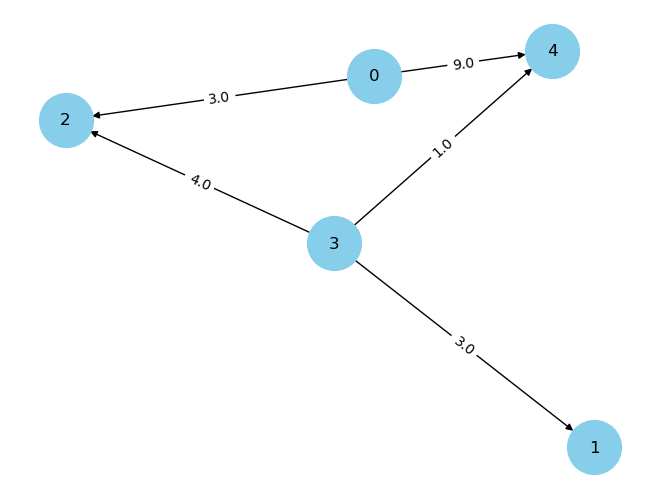

In [169]:
draw_graph_from_adj_matrix(graph)

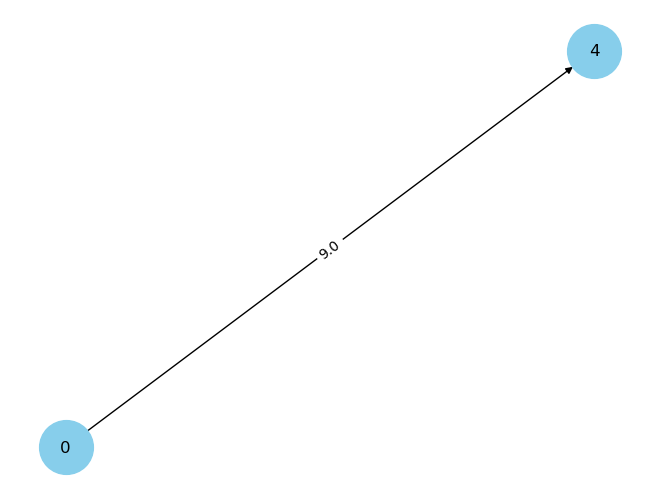

In [170]:
flow, optimized_graph = ford_fulkerson_optimized_graph(graph, source, sink)
draw_graph_from_adj_matrix(optimized_graph)

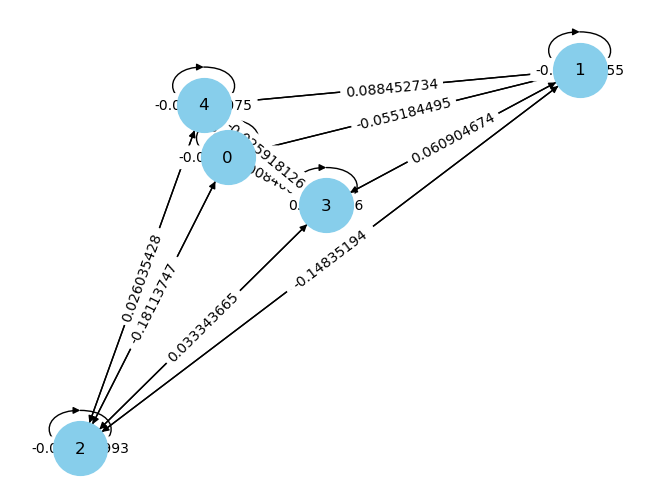

In [171]:
draw_graph_from_adj_matrix(predicted_optimized_matrix)